<a href="https://colab.research.google.com/github/project-ida/arpa-e-experiments/blob/neutrons-background-1/tutorials/Eljen-Background-Characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://nbviewer.org/github/project-ida/arpa-e-experiments/blob/neutrons-background-1/tutorials/Eljen-Background-Characterization.ipynb" target="_parent"><img src="https://nbviewer.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# Eljen Detector Background Characterization

### Prequel - What is an Eljen detector ?

Before we jump into background characterization, let's recall how these nuclear particle detectors work.

Eljen scintillator detectors work by converting ionizing radiation into visible light. Radiation excites molecules in the plastic; these de-excite and emit photons. The light is detected by a photomultiplier tube (PMT) or Silicon Photomultiplier (SiPM), producing an electrical signal proportional to the energy deposited.

### Experimental Setup - Our Eljen Detectors

We are running experiments in which we are looking out for the production of neutrons. In order to characterize these bursts, we need to be certain of the background levels against which we are comparing our experimental data.

In the lab, we have access to both a 2" and a 5" Eljen detector. In this notebook, our goal is to set up a precedure for chracterizing the background of one of these detectors from a "long" (~1 month) background measurment. More specifically, we would like to characterize the probabilistic distribution of the background counts picked up by our 2" Eljen detector and set up a protocol to use statistical tests to determine whether certain counts or bursts are background or events of significance in our experiments.

Hence, in this first notebook, we will begin by analysising our **2" Eljen detector**.

In order to do so, we began by running the Eljen detector in question throughout December 2024 and January 2025. On December 17th, we introduced a neutron source, ²⁵²Cf to collect some callibration data. We will now characterize this background---which will be useful for future analysis.


The data panel describing this background measurement can be found [here](https://lenr.mit.edu/data/load-panel.php?filename=eljen/eljen-2inch-long-term).

In [1]:
# RUN THIS IF YOU ARE USING GOOGLE COLAB
import sys
import os
!git clone https://github.com/project-ida/arpa-e-experiments.git
sys.path.insert(0,'/content/arpa-e-experiments')
os.chdir('/content/arpa-e-experiments')

Cloning into 'arpa-e-experiments'...
remote: Enumerating objects: 588, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 588 (delta 149), reused 95 (delta 85), pack-reused 388 (from 1)
Receiving objects: 100% (588/588), 33.74 MiB | 14.02 MiB/s, done.
Resolving deltas: 100% (356/356), done.
Updating files: 100% (57/57), done.


In [ ]:
# RUN THIS IF YOU ARE LOCAL.
# It makes sure we can import helpers from libs which is one level up

import sys
import os

# Get the parent directory (one level up from the current directory)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, project_root)

In [2]:
# Libraries and helper functions we will use throughout the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import ipywidgets as widgets
from IPython.display import display

from IPython.display import Image
from IPython.display import Video
from IPython.display import HTML

# Use our custom helper functions
# - process_data
# - plot_panels
# - plot_panels_with_scatter
# - print_info
from libs.helpers import *

In [3]:
meta = {
    "descriptor" : "Eljen 2 inch 12-2024" # This will go into the title of all plots
}

## Step 1 - Data Collection

Let us begin by collecting raw data on the Eljen detectors of interest, i.e. the 2" detector.  

We have collected long-term data on the neutron and gamma counts per second picked up by our Eljen detectors, from December 14th 2024 00:01:01 to January 23rd, 2025 23:58:59. They are defined as dataframes, which we can manipulate using the pandas python library, below.

In [4]:
neutron_df = pd.read_csv(
    'http://nucleonics.mit.edu/csv-files/eljen/eljen-2inch-long-term-1f.csv',
    parse_dates=['time'],
    date_format="ISO8601",
    index_col='time'
)

gamma_df = pd.read_csv(
    'http://nucleonics.mit.edu/csv-files/eljen/eljen-2inch-long-term-3f.csv',
    parse_dates=['time'],
    date_format="ISO8601",
    index_col='time'
)

In [7]:
# We will also begin numbering our figures here for easier reference later in the notebook
fig_counter = 0

## Step 2 - Visualizing Neutron and Gamma Counts

Now that we have collected the raw data (i.e. electric signal history) that interests us, let us have a look at the measured neutron and gamma counts.

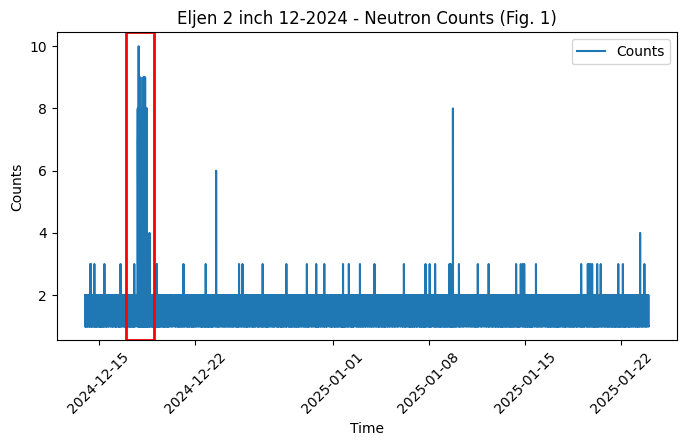

In [8]:
from matplotlib.patches import Rectangle

fig_counter += 1

plt.figure(figsize=(8, 4))
plt.plot(neutron_df['Counts'], label='Counts', zorder=1)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title(f"{meta['descriptor']} - Neutron Counts (Fig. {fig_counter})")

ax = plt.gca()
start = pd.to_datetime('2024-12-17')
end   = start + pd.Timedelta(days=2)
ymin, ymax = ax.get_ylim()

rect = Rectangle((start, ymin),
                 end - start,
                 ymax - ymin,
                 linewidth=2,
                 edgecolor='red',
                 facecolor='none',
                 zorder=2)

ax.add_patch(rect)

plt.legend()
plt.show()

In the above plot, we notice a sharp neutron burst on December 18th (which is highlighted by the red square in Fig. 1). This spike coincides exactly with the introduction of a ²⁵²Cf source into the laboratory.

According to the LNHB decay tables, ²⁵²Cf disintegrates by $\alpha$-emission almost exclusively to the ground state of ²⁴⁸Cm, and undergoes spontaneous fission with a branching ratio of $3.086 (8)%$ ([LNHB Cf-252 tables](http://www.lnhb.fr/nuclides/Cf-252_tables.pdf)).

In each fission event, an average of $3.7675 (40)$ neutrons are emitted, yielding:

$$
n \;=\; 3.086\% \times 3.7675 \;\approx\; 0.11627\ \text{neutrons per decay}
\quad\longrightarrow\quad
11.627\ \text{neutrons per 100 decays}
$$

Furthermore, spontaneous fission of ²⁵²Cf is accompanied by prompt [$\gamma$-rays emitted within $10^{-14}$–$10^{-12}\,\text{s}$ of fragment formation](https://www.sciencedirect.com/science/article/pii/0375947475904820?utm). The average $\gamma$-multiplicity is approximately [10.3 photons per fission](https://link.springer.com/article/10.1007/BF02847802?utm), essentially simultaneous with neutron emission. Therefore, we expect to observe a coincident $\gamma$-burst in any detector with sufficient energy threshold and timing resolution, aligned with the neutron spike seen on 18 December.

This is indeed the case in the following plot.

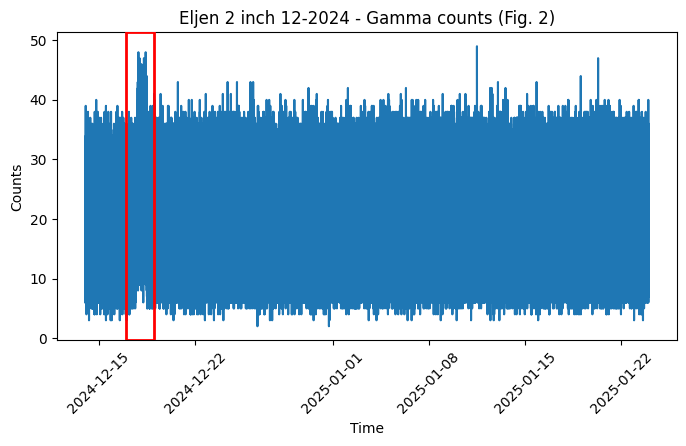

In [9]:
fig_counter +=1

plt.figure(figsize=(8, 4))
plt.plot(gamma_df['Counts'])
plt.xlabel('Time')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title(f"{meta['descriptor']} - Gamma counts (Fig. {fig_counter})")

# highlight December 17th - 18th with a red square
ax = plt.gca()
start = pd.to_datetime('2024-12-17')
end   = start + pd.Timedelta(days=2)
ymin, ymax = ax.get_ylim()
rect = Rectangle(
    (start, ymin),
    end - start,
    ymax - ymin,
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    zorder=10
)
ax.add_patch(rect)


plt.show()
# plt.savefig("all-gamma-counts-sec.png", dpi=600)

## Step 3 - Resampling Data and Removing Neutron Burst from Background Data

The current data is taken about once per second. We'll now aggregate this data to present counts in 1 minute intervals.

This is an arbitrary choice, but will allow us to develop some intuition about count binning. Indeed, larger time intervals will necessarily include more counts, so it will be easier to distinguish by eye any significant events. This is not nessecarily the method we will keep for further analysis, given its dependence on an arbitrary bin choice, but it remains useful in our intuition building. In the future, we hope to remove the arbitrarity of binning all together (see later notebook introduced in last section of this notebook).

Furthermore, we noticed above a neutron and gamma burst begining on December 17th. This corresponded to a time-period in which we brought a ²⁵²Cf neutron source into the lab (i.e. the bursts that the detectors are picking up). Hence, in order to define a clear background time, we will start collecting data from December 19th.

So, in sum, our next step is to :

1. **Aggregate** the raw second-by-second counts into 1 minute bins.  
2. **Exclude** the burst period when the ²⁵²Cf source was in the lab, and begin our background analysis on December 19.

In [11]:
neutron_df_1_minute = neutron_df.resample('1min').sum()
gamma_df_1_minute = gamma_df.resample('1min').sum()

# Assuming neutron_df_1_minute has a datetime index
start_time = "2024-12-19 00:00:00"
end_time = "2025-01-23 23:59:00"

neutron_df_1_minute_background = neutron_df_1_minute.loc[start_time:end_time]
gamma_df_1_minute_background = gamma_df_1_minute[start_time:end_time]

## Step 4 - Analyzing the Measured Background Counts

Now that we have excluded the time before and when the neutron source was introduced, let us take a closer look at our background neutron counts.

Here are the different steps we will take:

**Side-step 4.1 Expected Poisson Distribution**
- *Fitting the experimental data to a Poisson distribution*
- *Checking quantitatively the goodness of the fit*

**Side-Step 4.2 Stability of the Background Rate and Normality of Daily Means**
- *Fitting the experimental data to a Normal distribution*
- *Checking quantitatively the goodness of the fit*

**Side-Step 4.3 Comparing our Background Rates with the Literature**
- *Reference Neutron Background Flux*


We will start by building a daily histogram of the background neutron counts per minute. Each line in the plot will represent one day’s worth of 1 minute bins, normalized to form a probability distribution. This lets us see how the shape of the count distribution varies from day to day.

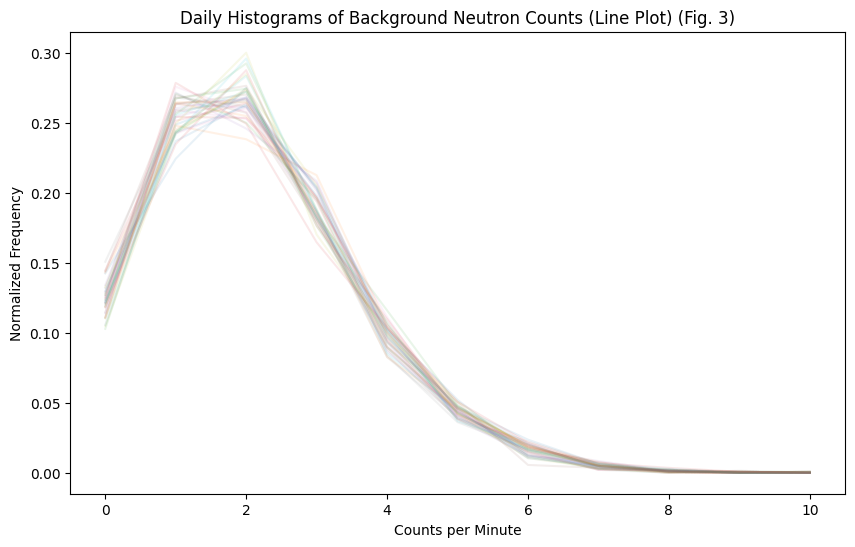

In [15]:
fig_counter += 1

# Ensure the index is datetime
neutron_df_1_minute_background.index = pd.to_datetime(neutron_df_1_minute_background.index)

# Group by day
grouped_by_day = neutron_df_1_minute_background.groupby(neutron_df_1_minute_background.index.date)

# Define bins for the histogram
bins = np.arange(neutron_df_1_minute_background["Counts"].min(),
                 neutron_df_1_minute_background["Counts"].max() + 1, 1)  # Use integer bins

# Plot all histograms as line plots
plt.figure(figsize=(10, 6))

for day, group in grouped_by_day:
    hist_values, bin_edges = np.histogram(group["Counts"], bins=bins, density=True)
    plt.plot(bin_edges[:-1], hist_values, alpha=0.1, label=str(day))

plt.xlabel("Counts per Minute")
plt.ylabel("Normalized Frequency")
plt.title(f"Daily Histograms of Background Neutron Counts (Line Plot) (Fig. {fig_counter})")
plt.show()

Let us quickly comment on how to read this plot:

- Each colored line corresponds to one calendar day’s distribution of 1 minute neutron counts.
- Horizontal axis: number of counts detected in a 1 min bin (i.e. n counts per minute, with n the numbers on the x-axis).
- Vertical axis: normalized frequency (so that areas under each curve sum to 1).
- The shading/transparency helps you see where multiple days’ distributions overlap. Each color corresponds to the data from a different day.

## Side-step 4.1 Expected Poisson Distribution

In order to conduct a statistical analysis on these background counts, we need to have an idea of what qualifies as a "significant" deviation from background. This will be of interest when trying to determine whether or not we have detected a "significant" number of neutron counts.



## Fitting to a Poisson distribution

Neutron background counts are typically modeled by a Poisson distribution because they arise from random, independent events which occur at a constant average rate over time. Our experimental setup aligns with the conditions under which the Poisson distribution is valid:

- Rare Events: Background neutrons are detected infrequently and individually; each detection is a discrete event.

- Statistical Independence: The arrival of one neutron does not affect the probability of another arriving.

- Constant Rate: Over short timescales (like 1-minute bins), the average background rate is approximately constant.

- Fixed Observation Interval: Counts are measured over uniform time intervals (i.e. counted over fixed 1 minute intervals).

Under these conditions, the number of neutrons detected in a fixed time interval should follow a Poisson distribution with mean λ, where λ is the expected number of events (neutrons) per interval.

The standard deviation would thus be $\sigma = \sqrt{λ}$

Furthermore, in the literature, we will typically consider that count is "significantly high" if it exceeds $\lambda + \sqrt{\lambda}\cdot Z$

where $Z = 3$ corresponds to a $3\sigma$ threshold (confidence level ~99.7%)

Let us now have a closer look at how close our experimental background measurements are to a Poisson distribution, and extract its key statistical features.

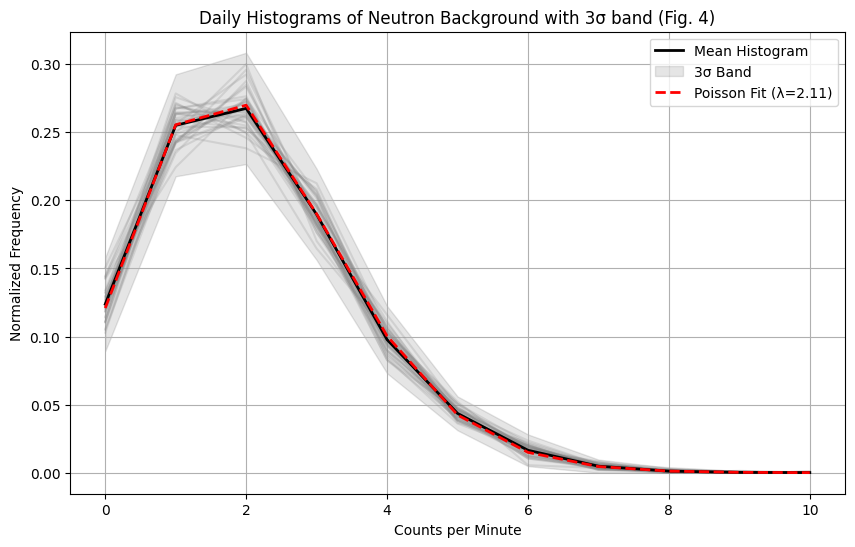

In [16]:
fig_counter += 1

histograms = []
for day, group in grouped_by_day:
    hist_values, bin_edges = np.histogram(group["Counts"], bins=bins, density=True)
    histograms.append(hist_values)

# Convert list to array and compute mean + std across days
histograms = np.array(histograms)
mean_histogram = np.mean(histograms, axis=0)
std_histogram = np.std(histograms, axis=0)

# Estimate Poisson background mean
lambda_ = neutron_df_1_minute_background["Counts"].mean()
threshold_3sigma = lambda_ + 3 * np.sqrt(lambda_)


# Poisson fit
k_values = bin_edges[:-1]  # Use bin centers (left edges)
poisson_pmf = stats.poisson.pmf(k_values, mu=lambda_)

# Normalize Poisson PMF for visual comparison
poisson_pmf_normalized = poisson_pmf / np.sum(poisson_pmf)  # Normalize manually
poisson_pmf_normalized *= np.sum(mean_histogram)  # Match total area to empirical hist

plt.figure(figsize=(10, 6))

# daily histograms
for hist_values in histograms:
    plt.plot(bin_edges[:-1], hist_values, alpha=0.2, color='gray')

# mean histogram
plt.plot(bin_edges[:-1], mean_histogram, color='black', linewidth=2, label='Mean Histogram')

# 3σ band
plt.fill_between(bin_edges[:-1],
                 np.maximum(mean_histogram - 3 * std_histogram, 0),
                 mean_histogram + 3 * std_histogram,
                 color='black', alpha=0.1, label='3σ Band')

# Poisson fit overlay
plt.plot(k_values, poisson_pmf_normalized, 'r--', linewidth=2, label=f'Poisson Fit (λ={lambda_:.2f})')

plt.xlabel("Counts per Minute")
plt.ylabel("Normalized Frequency")
plt.title(f"Daily Histograms of Neutron Background with 3σ band (Fig. {fig_counter})")
plt.legend()
plt.grid(True)
plt.show()


Let's take a step back to understand the graph we are looking at above.

The black line corresponds to the average distribution of neutron counts across all days.

The grey shaded area shows the spread of day-to-day variation, with upper and lower bounds at 3 standard deviations above and below the mean. Days that would lie outside this band would be statistically rare under normal conditions (probability < 0.3%). Hence, we may identify neutron bursts in future runs by looking at "outliers" of this grey shaded area.

The red dashed line corresponds to the theoretical distribution assuming that neutron counts follow a Poisson process. We plotted this normalized Poisson ditribution assuming the Poisson paramter $\lambda$ to me the mean of our background data i.e. $\lambda \approx 2.11$.

## Quantitative goodness-of-fit

In order to test more rigorously whether our background truly follows a Poisson process, we can perform a $χ^2$ (chi-square) goodness-of-fit test comparing the observed mean histogram to the expected Poisson probabilities:

1. Compute the test statistic  
   $$
     \chi^2 = \sum_{k} \frac{(O_k - E_k)^2}{E_k},
   $$
   where $O_k$ are the observed counts in bin $k$ (from the mean histogram) and $E_k = N_{\rm tot}\,P_{\rm Poisson}(k;\lambda)$.  
2. Under the null hypothesis (data ∼ Poisson\($\lambda)$, $\chi^2$ follows a $\chi^2$ distribution with $\text{Degrees of Freedom} = \text{number of bins} - 1 - 1$ (subtracting one for the estimated $\lambda$ and 1 for normalization).  
3. A large $p$-value $(p>0.05$) implies we cannot reject the Poisson hypothesis at the $5 \%$ level.

In the code below, we conduct this goodness of fit analysis and find a p value of $p = 0.9996229005$ so we cannot reject the null-hypothesis. Hence, for our purposes, we are in a good position to say that background follows a Poisson process.

In [17]:
# — Chi-square goodness-of-fit test —
# Aggregate observed counts across all days
O_counts = histograms.sum(axis=0)       # observed total counts per bin
N_tot = O_counts.sum()                         # total number of 1-min intervals

# Expected counts under Poisson(λ)
pk = stats.poisson.pmf(k_values, mu=lambda_)
E_counts = N_tot * pk

# Compute χ² statistic and p-value
chi2_stat = np.sum((O_counts - E_counts)**2 / E_counts)
dof = len(k_values) - 2  # degrees of freedon = bins minus 1 (normalization) minus 1 (λ estimated)
p_value = stats.chi2.sf(chi2_stat, dof)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.10f}")

if p_value > 0.05:
    print("Cannot reject Poisson(λ) at the 5% significance level.")
else:
    print("Data significantly deviate from Poisson(λ).")


Chi-square statistic: 0.01
Degrees of freedom: 9
p-value: 1.0000000000
Cannot reject Poisson(λ) at the 5% significance level.


## Side-Step 4.2 Stability of the Background Rate and Normality of Daily Means

## Fitting to a Normal Distribution

Furthermore, before trusting the aformentioned single global $\lambda$, we should check how much the daily average neutron count per minute varies over our measurement period, and whether those daily means themselves follow an approximately normal distribution (by the Central Limit Theorem, if $\lambda$ is truly constant).


Daily mean counts per minute: μ = 2.11, σ = 0.05


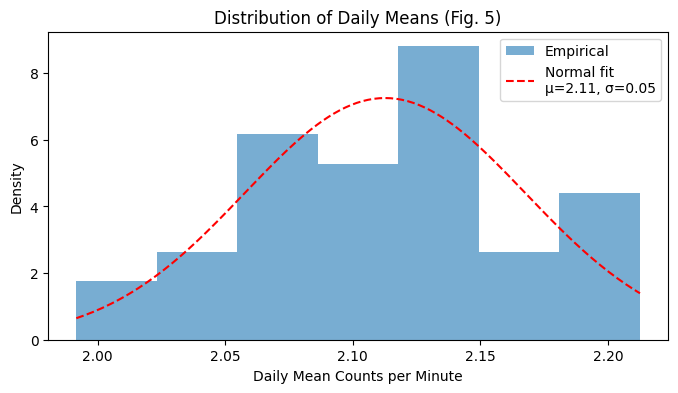

In [20]:
fig_counter += 1

# 1. Compute daily means
daily_means = [group["Counts"].mean() for _, group in grouped_by_day]
days = list(grouped_by_day.groups.keys())

# 2. Summary statistics
mu_daily   = np.mean(daily_means)
sigma_daily = np.std(daily_means)
print(f"Daily mean counts per minute: μ = {mu_daily:.2f}, σ = {sigma_daily:.2f}")

# 3. Histogram of daily means with Normal fit overlay
plt.figure(figsize=(8, 4))
# histogram
vals, edges, _ = plt.hist(daily_means, bins='auto', density=True, alpha=0.6, label='Empirical')
# normal PDF
x = np.linspace(min(edges), max(edges), 200)
pdf = stats.norm.pdf(x, loc=mu_daily, scale=sigma_daily)
plt.plot(x, pdf, 'r--', label=f'Normal fit\nμ={mu_daily:.2f}, σ={sigma_daily:.2f}')
plt.xlabel('Daily Mean Counts per Minute')
plt.ylabel('Density')
plt.title(f'Distribution of Daily Means (Fig. {fig_counter})')
plt.legend()
plt.show()

## Quantitative goodness-of-fit

The above plot does not shed enough light on how close our mean distribution is to a normal distribution. In order to determine the quantitative goodness of our fit, we may start with a graphical check: the QQ-plot. This plot sample quantiles vs theoretical normal quantiles; and deviations from the straight line highlight non-normality.

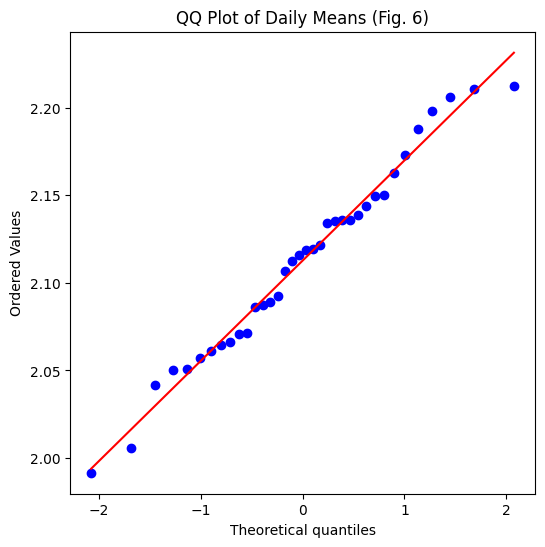

In [21]:
fig_counter += 1

# 4. QQ-plot for normality check
plt.figure(figsize=(6, 6))
stats.probplot(daily_means, dist="norm", plot=plt)
plt.title(f'QQ Plot of Daily Means (Fig. {fig_counter})')
plt.show()

The plot above shows us that the experimental distribution is fairly "linear", i.e. close to a normal distribution. However, is not a good enough "quantitative" measure of the goodness of our fit. For this, we will perform the Shapiro-Wilk test.

The Shapiro–Wilk test computes a statistic  
$$
W \;=\; \frac{\bigl(\sum_{i=1}^n a_i\,x_{(i)}\bigr)^2}
                {\sum_{i=1}^n\bigl(x_i - \bar x\bigr)^2}\,,
$$  

where the $x_{(i)}$ are the ordered sample values, the $a_i$ are constants derived from the means and covariances of order statistics of a normal distribution, and $\bar x$ is the sample mean.  Under the null hypothesis that the data come from a normal distribution, $W$ is close to 1; values substantially below 1 indicate departure from normality.

In practice, we obtain from `scipy.stats.shapiro(daily_means)` both the test statistic $W$ and a $p$-value.  We then compare the $p$-value to our significance level (commonly $\alpha=0.05$):

- If $p > 0.05$, we **fail to reject** the null hypothesis: there is no strong evidence against normality.
- If $p \le 0.05$, we **reject** the null hypothesis: the daily means significantly deviate from a normal distribution.


In [22]:
# 5. Shapiro–Wilk test for normality
W, p_value = stats.shapiro(daily_means)
print(f"Shapiro–Wilk test: W = {W:.4f}, p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Fail to reject H₀: data are consistent with a normal distribution")
else:
    print("Reject H₀: data significantly deviate from normality")

Shapiro–Wilk test: W = 0.9781, p-value = 0.6797
Fail to reject H₀: data are consistent with a normal distribution


By combining the visual Q–Q plot and the Shapiro–Wilk test, we obtain both qualitative and quantitative assurance that our daily means are well-approximated by a normal distribution. Hence, we may me confident in using a single global $\lambda$ for the background rate.  

So, it is a reasonable assumption to claim that our $\lambda$ is essentially constant over the January-December background collection period.

## Side-Step 4.3 Comparing our Background Rates with the Literature


### Reference Neutron Background Flux

For benchmarking our Eljen detector measurements against a well-established baseline, we will start by adopting the sea-level cosmic-ray neutron flux measured by [Gordon et al. (2004)](https://ieeexplore.ieee.org/document/1369506) on the roof of the IBM T. J. Watson Research Center in Yorktown Heights, NY:

> **Φ<sub>ref</sub> = 0.0134 n cm<sup>−2</sup> s<sup>−1</sup>**  

This value was Measured at ∼20 m a.s.l., geomagnetic cutoff ≃ 3 GV, and mid-level solar activity. In their paper, Gordon et al. provided corrections for different coordinates, altitudes, geomagnetic cutoffs and solar activity.

Hence, we will follow the equations given in the paper, and adapt to our experimental conditions, adjusting for location, time, and detector efficiency in order to define a value for the expected background neutron flux from cosmic-rays.

Let us begin by applying a site-adjustment,  i.e.
   - Apply the altitude-dependence correction ([Gordon et al. (2004)](https://ieeexplore.ieee.org/document/1369506) Eq. (4)) to account for our [lab elevation]( https://elevation.maplogs.com/poi/massachusetts_institute_of_technology_77_massachusetts_ave_cambridge_ma_usa.197544.html).  
   - Apply [geomagnetic-rigidity](https://www.spenvis.oma.be/models.php) and [solar-modulation](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JA023819) corrections ([Gordon et al. (2004)](https://ieeexplore.ieee.org/document/1369506) Eqs. (3) & (5)) for our latitude and current solar cycle.


NB: *The hyper-links above correspond to references for the sources of the figures we will use for adaptiation to our specific experimental environment.*


In [23]:
# --- Reference flux and site parameters (Gordon et al. 2004) ---
Phi_ref = 0.0134         # Reference total flux [n cm⁻² s⁻¹] at Yorktown Heights
h_ref = 20.0             # Reference altitude [m a.s.l.]
Rc_ref = 3.0             # Reference geomagnetic cutoff rigidity [GV]
phi_ref = 550.0          # Reference solar‐modulation potential [MV]

# --- Our lab’s parameters at MIT Building 13, 3rd floor ---
# Elevation of MIT main campus: 3 m a.s.l. (77 Massachusetts Ave) : https://elevation.maplogs.com/poi/massachusetts_institute_of_technology_77_massachusetts_ave_cambridge_ma_usa.197544.html
# + ~10 m for 3rd-floor height → total ≈ 13 m
h_lab = 13.0             # Lab elevation [m a.s.l.]

# Effective vertical cutoff rigidity for Cambridge, MA ≈ 1.50 GV : https://www.spenvis.oma.be/models.php
Rc_lab = 1.50            # Lab geomagnetic cutoff rigidity [GV]

# Current solar‐modulation potential (approximate) – Usoskin, I.G., A. Gil, G.A. Kovaltsov, A. Mishev, V.V. Mikhailov (2017) Heliospheric modulation of cosmic rays during the neutron monitor era: Calibration using PAMELA data for 2006-2010, J. Geophys. Res. Space Phys., 122, 3875-3887 doi: 10.1002/2016JA023819
phi_lab = 881.0          # Lab solar‐modulation potential [MV]

# --- Gordon et al. scaling parameters ---
H_scale = 1400.0         # Altitude scale height [m] (Eq. 4)
alpha = 0.8              # Rigidity exponent (Eq. 3)
beta = 0.005             # Solar‐modulation coefficient [per MV] (Eq. 5)

# 1) Altitude‐dependence correction (Gordon Eq. 4)
#    Φ(h) = Φ_ref × exp[(h_lab – h_ref) / H_scale]
Phi_alt = Phi_ref * np.exp((h_lab - h_ref) / H_scale)

# 2) Geomagnetic‐rigidity correction (Gordon Eq. 3)
#    Φ(Rc) = Φ(h) × (Rc_lab / Rc_ref) ** alpha
Phi_rig = Phi_alt * (Rc_lab / Rc_ref) ** alpha

# 3) Solar‐modulation correction (Gordon Eq. 5)
#    Φ_mod = Φ(Rc) × [1 + beta × (phi_lab – phi_ref)]
Phi_lab = Phi_rig * (1 + beta * (phi_lab - phi_ref))

print(f"Scaled neutron flux at lab: {Phi_lab:.4f} n cm⁻² s⁻¹")


Scaled neutron flux at lab: 0.0203 n cm⁻² s⁻¹


Let us now move on to correcting for **Detector Response**, i.e. perform and **Efficiency Correction**.   

In order to benchmark our background count rates, we need an estimation of the detector's efficiency. In order to do this, we will use the callibration data collected when a ²⁵²Cf source was introduced in the lab, on December 17th.

Let us first determine the activity of our source at the time of the callibration experiment.

We know that our source strength was $17.3$ nCi on September 4th, 2024.  Let us assume it was introduced on December 18th, 2024 at 12:00:00. Given the half-life of our source, ²⁵²Cf, which is $2.647$ years, we can estimate what our source strength was the day of the experiment: $16.040$ nCi. Furthermore, we know that $1$ µCi = $3.7×10^4$ disintegrations per second = $2.22×10^6$ disintegrations per minute (dpm). Hence $1$ nCi = $37$ dps = $2.22*10^3$ dpm

Finally, "*Cf-252 disintegrates by $\alpha$ emissions mainly to the Cm-248 ground state level, and by spontaneous fission for $3,086%$*" (cf [Be et al. (2013)](https://inis.iaea.org/search/search.aspx?orig_q=RN%3A45014763&utm)

This efficiency calculation is undertaken in the following code cells.

Let's first have a look at when the source was in the lab:

/tmp/ipython-input-24-3761940093.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  cps = neutron_df['Counts'].resample('1S').sum()


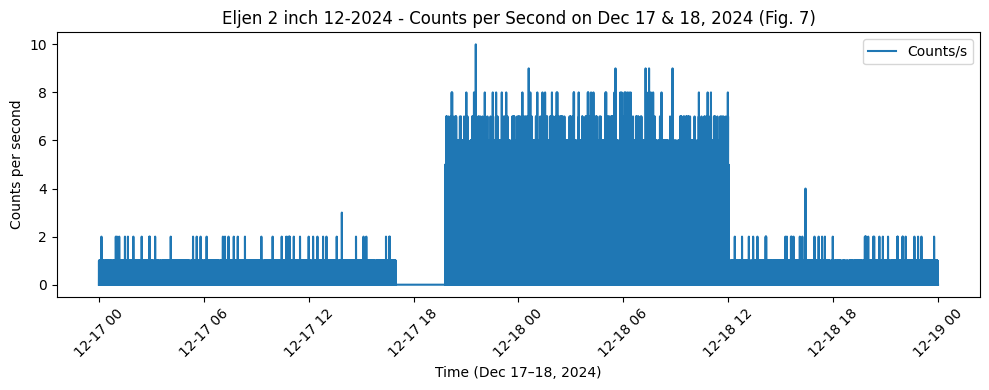

In [24]:
# Resample to counts per second
cps = neutron_df['Counts'].resample('1S').sum()

# Filter for December 17 and 18, 2024
dec17_18_cps = cps.loc['2024-12-17':'2024-12-18']

# Plot
fig_counter += 1
plt.figure(figsize=(10, 4))
plt.plot(dec17_18_cps.index, dec17_18_cps.values, label='Counts/s')
plt.xlabel('Time (Dec 17–18, 2024)')
plt.ylabel('Counts per second')
plt.xticks(rotation=45)
plt.title(f"{meta.get('descriptor', 'Eljen Detector')} - Counts per Second on Dec 17 & 18, 2024 (Fig. {fig_counter})")
plt.legend()
plt.tight_layout()
plt.show()


From the plot above, we will choose our callibration period to be from december 17th 21:00:00 to december 18th 11:00:00.

In [25]:
from datetime import datetime
# Compute neutron emission rate from Cf-252 decay
def cf252_neutron_emission(A0, date_initial, date_experiment):
    """
    Compute neutron source emission rate accounting for Cf-252 decay.
    """
    half_life = 2.645  # Years from https://www.nndc.bnl.gov/nudat3/decaysearchdirect.jsp?nuc=252Cf&unc=NDS
    decay_constant = np.log(2) / half_life
    #spontaneous_fission_fraction = 0.03086
    spontaneous_fission_fraction = 0.031
    #neutrons_per_fission = 3.7573
    neutrons_per_fission = 3.76
    conversion_factor = 37  # nCi to disintegrations per second

    # Compute decay over time
    time_difference = (date_experiment - date_initial).days / 365.25
    At = A0 * np.exp(-decay_constant * time_difference)
    dps_t = At * conversion_factor

    # Compute neutron emission rate
    neutrons_per_second = dps_t * spontaneous_fission_fraction * neutrons_per_fission
    return neutrons_per_second

# Define source activity and experiment date
A0 = 17.3  # Initial activity in nCi
source_date = datetime(2024, 9, 4)
experiment_date = datetime(2024, 12, 18, hour=1, minute=00)

neutrons_per_second = cf252_neutron_emission(A0, source_date, experiment_date)

print(f"Neutron emission rate: {neutrons_per_second:} n/s")

Neutron emission rate: 69.19578418464562 n/s


In [26]:
# Define calibration period around Cf-252 measurement
calib_start =  datetime(2024, 12, 17, hour=21, minute=00)
calib_end =  datetime(2024, 12, 18, hour=11, minute=00)

# Extract counts and live time
calib_df = neutron_df.loc[calib_start:calib_end]
N_detected = calib_df['Counts'].sum()
measurement_time = calib_df.index[-1] - calib_df.index[0]
measurement_time_secs = measurement_time.total_seconds()

# Compute absolute efficiency
measured_rate = N_detected / measurement_time_secs    # counts per second
efficiency    = measured_rate / neutrons_per_second     # ε₀, spectrally-averaged

# Compute intrinsic efficiency
d_cm = 1.5 * 2.54         # source-detector distance [cm]
r_cm = 2.0 / 2 * 2.54        # detector radius [cm]

# Solid angle Ω of a circular face at distance d:

def solid_angle(radius, distance):
    """
    Compute the solid angle (steradians) subtended by a circular detector of radius 'radius'
    at a distance 'distance' from the source.
    """
    return 2 * np.pi * (1 - distance / np.sqrt(distance**2 + radius**2))

Omega = solid_angle(r_cm, d_cm)

N_expected = neutrons_per_second * (Omega / (4 * np.pi)) * measurement_time_secs

intrinsic_efficiency = N_detected / N_expected if N_expected > 0 else 0


# Geometric efficiency = Ω / 4π
geom_eff = Omega / (4 * np.pi)

# Intrinsic efficiency = absolute (ε₀) / geometric efficiency
intrinsic_eff = efficiency / geom_eff

# intr_efficiency = 0.06987170811381051 (from old notebook)

# --- Print extracted calibration metrics ---
print(f"Calibration period: {calib_start} to {calib_end}")
print(f"Total counts measured: {N_detected}")
print(f"Measured rate (cps) : {measured_rate}")
print(f"Live time: {measurement_time_secs:.1f} seconds")
print(f"Absolute Efficiency (ε₀)    : {efficiency:.6f}")
print(f'Computed Intrinsic efficiency: {intrinsic_efficiency}')

Calibration period: 2024-12-17 21:00:00 to 2024-12-18 11:00:00
Total counts measured: 98650
Measured rate (cps) : 1.9573412698412698
Live time: 50400.0 seconds
Absolute Efficiency (ε₀)    : 0.028287
Computed Intrinsic efficiency: 0.3368508644943161


Now, we have $\phi(E)$, the scaled differential flux [n cm<sup>−2</sup> s<sup>−1</sup> MeV<sup>−1</sup>] and $\epsilon$(E) the Eljen detector efficiency. We can thus now compute the expected count rate:  

$$R_{\rm pred} = \int_{E_{\min}}^{E_{\max}} \Phi(E)\,\epsilon(E)\,dE$$  

For the current purpose of our computations, we will assume our efficiency to be energy independent.

In [27]:
# Let's compute expected background count rate R_pred
# Energy grid for integration [MeV]
E_min, E_max, n_pts = 0.1, 1000.0, 5000
E = np.logspace(np.log10(E_min), np.log10(E_max), n_pts)

# Define differential flux Φ(E) per Gordon et al. Eq. (6)
gamma = 1.65
E0 = 0.4  # pivot [MeV]
A_spectrum = Phi_lab * (gamma - 1) * E0**(gamma - 1)
Phi_E = np.where(E >= E0, A_spectrum * E**(-gamma), 0.0)  # [n cm⁻² s⁻¹ MeV⁻¹]

# detector efficiency ε(E):
#eps_E = efficiency
eps_E = intrinsic_efficiency

# Integrate R_pred = ∫ Φ(E)·ε(E) dE using numpy.trapz
R_pred = np.trapezoid(Phi_E * eps_E, E)
print(f"Predicted background rate: {R_pred:.4e} counts·cm⁻²·s⁻¹")

Predicted background rate: 6.8058e-03 counts·cm⁻²·s⁻¹


Now that we have our corrected predicted background rate: 6.8058e-03 counts·cm⁻²·s⁻¹

Let's compute how many counts we expect to measure on our 2″ Eljen detector.

In [ ]:
# --- accounting for detector geometry ---
# we will consider the horizontal cross-section of the detector
# ie we will consider what one would see of the detector from the top (bird's eye view)
# ie a 2 inch by 2inch square
area_cm2 = (2*2.54)**2

# --- expected counts ---
R_det = R_pred * area_cm2            # counts per second

print(f"Detector area     : {area_cm2:.1f} cm²")
print(f"Expected rate    : {R_det:.4f} counts/s")
print(f"Expected counts per min   : {R_det*60} counts/min ")

Detector area     : 25.8 cm²
Expected rate    : 0.1756 counts/s
Expected counts per min   : 10.537957431758537 counts/min 


From the section above (see figure 4 or 5), we know that the mean number of counts over the period of background characterization is 2.11 counts/min.

Let us briefly comment on this. We observe that the expected count rate from [Gordon et al. (2004)](https://ieeexplore.ieee.org/document/1369506) of $10.54$ counts/minute is higher than the observed rate, but of the same order of magnitude.

A possible explanation for this  discrepency is the fact that we considered the horizontal cross-section of our Eljen detector as the interacting surface.

In [28]:
# We may also want to take the brute value from the paper to check that we are on the right order of magnitude below
# without all the corrections just taking 0.0134 as our flux

Phi_simple = 0.0134  # neutron flux [n cm⁻² s⁻¹]

d_inch = 2.0               # diameter in inches
d_cm = d_inch * 2.54       # convert to cm
r_cm = d_cm / 2.0          # radius in cm
area_cm2 = np.pi * r_cm**2 # active face area [cm²]


# --- Expected count rate and total counts ---
R_det = Phi_simple * area_cm2       # counts per second in detector
R_det_per_min = R_det * 60  # counts per minute to compare


print(f"Detector area     : {area_cm2:.1f} cm²")
#print(f"Expected rate     : {R_det:.4f} counts/s")
print(f"Expected rate: {R_det_per_min:.1f} counts/min")


Detector area     : 20.3 cm²
Expected rate: 16.3 counts/min


Above, we notice that this "brute force" estimation from the paper is of the same order of magnitude as our previously observed value, so this serves as a sort of sanity check.  

## Step 5 – From Statistical Characterization to an Actionable Protocol

### 1. Summary of Background Characterization  

Let's take a quick break to see what we have established so far:

**Poisson behavior confirmed.**  
- Chi-square test on the aggregated daily histograms yielded $\chi^2 = 0.01$, dof = $9$, $p = 1$, so we cannot reject that our long-term background follows $\mathrm{Poisson}(\lambda$ at the $5\%$ significance level.  


**Mean and variance stability.**  
  - Global background rate  
    $$
      \lambda = 2.11 \;\text{counts/min},
      \quad \sigma_{\rm bkg} = \sqrt{\lambda} \approx 1.45.
    $$  
  - Daily‐mean distribution was nearly Gaussian with  
    $$\mu_{\rm daily}=2.11, \sigma_{\rm daily}=0.05$$

**Investigation of known background literature.**  
  - Expected background neutron counts from cosmic-rays of $10.54$ counts per minute.  

Together, these results show that over weeks of data our detector background is:

- Well described by a Poisson process with mean $\lambda$
- Highly stable
- Reliable as it is of the same order of magnitude as expected background from cosmic-rays

### 2. Protocol for Pre-Experiment “Quick Check”  

Let's now take a step back to remember the motivation for this notebook: background characterization of our Eljen detector. One of the main desired outcomes is thus a protocol to establish background for a new run using the Eljen detectors. In order to do this, we will propose the following:

Before each new experimental run, we should perform a short background measurement (e.g. few hours to 24 hours ideally) and then:

1. Compute the short-run mean  
   $$\hat\lambda_{\rm short} = \frac{\text{total counts in check}}{\text{duration in minutes}}$$
2. Compare to long-term λ
3. Goodness‐of‐fit test (optional)
   - Build a quick histogram of the short-run counts and perform a χ² test against $\mathrm{Poisson}(\lambda)$.  
   - If $p > 0.05$, background is consistent; otherwise investigate.  
4. Decision  
   - If consistent: proceed with the planned experiment.  
   - If anomalous: pause and check for  
     - Instrument issues   
     - Environmental changes
     - Anomalies in cosmic‐ray “weather”

By embedding this “quick‐check” step into every experimental workflow, we ensure that our background conditions match the long‐term characterization before any experiment is conducted.

# Looking Forward - Bin-Independent Distributions

In the notebook above, we chose arbitrary time-bins of 1 second and 1 minute. However, our Eljen detectors do not record counts per minute, but rather record individual waveforms and their timestamps with nano-second precision. Thus, it would be possible to implement a neutron background analysis method independent of binning.

We propose to work instead directly with inter-arrival times (deltas) between successive neutron/ gamma counts. This approach appears rather natural for a Poisson process, where the times between events follow and exponentional ditribution.

Let us propose a temporary outline for this method, which we will elaborate in a future notebook.


### 1. Record the inter-arrival times

Let our raw timestamps be  
$$t_1, t_2, \dots, t_N$$  
(measured in seconds with our Eljen detector’s native nanosecond precision).  Define  
$$\Delta t_i = t_{i} - t_{i-1},\quad i=2,\dots,N.$$  
Because our detector’s resolution is $\Delta t_{\min} = 1\ \mathrm{ns}$ but the observed spacings are typically much larger, we can treat the data as effectively continuous.

### 2. Empirical cumulative distribution (CDF)

Instead of a histogram, we build the empirical CDF of the inter-arrival times:
$$
\widehat F(t)
\;=\;
\frac{1}{N-1}
\sum_{i=2}^{N}
\mathbf{1}\bigl(\Delta t_i \le t\bigr).
$$
Plotting $\widehat F(t)$ against $t$ gives the **cumulative spectrum**:
- On the horizontal axis: time $t$ (s)
- On the vertical axis: probability $P(\Delta t \le t)$

### 3. Comparison to the theoretical exponential CDF

For a homogeneous Poisson process with rate $\lambda$ (counts per second), the true inter-arrival distribution is  
$$
F_{\rm exp}(t) = 1 - e^{-\lambda\,t}.
$$  
We can overlay this on our empirical CDF:
1. Estimate $\lambda = 1 / \bar{\Delta t}$.  
2. Compute  
   $$
   F_{\rm exp}(t) = 1 - \exp\!\bigl(-t / \bar{\Delta t}\bigr).
   $$
3. Plot both curves on the same axes to visually assess agreement.


### 4. Quantitative goodness-of-fit

To go beyond the visual overlay, we can perform a **Kolmogorov–Smirnov (K–S) test** comparing
$$
\{\Delta t_i\}_{i=2}^N
$$
to the exponential distribution with parameter $\hat\lambda = 1/\bar\Delta t$.  In Python: